In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_data = []
Y_data = []

for i in range(500):
    x = np.random.randint(1, 80, 2)
    X_data.append(x)
    Y_data.append(np.ones(1))

In [3]:
for i in range(500):
    x = np.random.randint(-100, -5, 2)
    X_data.append(x)
    Y_data.append(np.zeros(1))

In [11]:
X_data

array([[ 29,  64],
       [ 14,  44],
       [  2,  26],
       ...,
       [-50, -81],
       [-22, -17],
       [-12, -74]])

In [5]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)

In [6]:
Y_data.shape

(1000, 1)

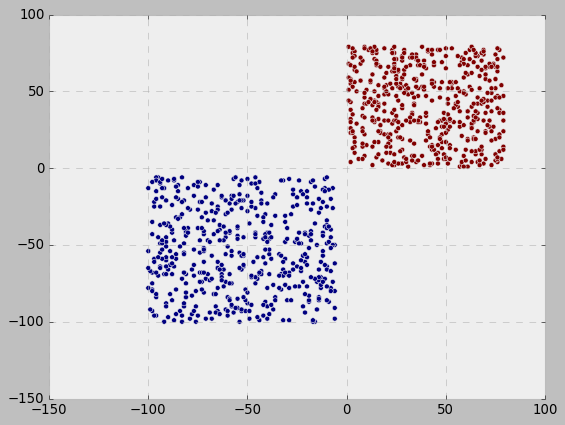

In [31]:
plt.scatter(X_data[:, 0], X_data[:, 1], c = Y_data)

In [8]:
print(X_data.shape, Y_data.shape)

(1000, 2) (1000, 1)


In [9]:
import sklearn
dataset_X, dataset_Y = sklearn.utils.shuffle(X_data, Y_data, random_state=5)

In [10]:
print(dataset_X.shape, dataset_Y.shape)

(1000, 2) (1000, 1)


In [12]:
dataset = np.hstack((X_data, Y_data))

In [13]:
dataset.shape

(1000, 3)

In [14]:
np.random.seed(5)
np.random.shuffle(dataset)

In [15]:
datasetX = dataset[:, :2]
datasetY = dataset[:, 2]

In [16]:
datasetY = datasetY.reshape((-1, 1))
print(datasetY.shape, datasetX.shape)

(1000, 1) (1000, 2)


In [17]:
train_X = datasetX[:800, :]
train_Y = datasetY[:800, :]
test_X = datasetX[800:, :]
test_Y = datasetY[800:, :]

In [18]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(800, 2) (800, 1) (200, 2) (200, 1)


In [19]:
def distance_formula(p1, p2):
    dist = ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    return dist

In [20]:
print(distance_formula([10, 10], [10, 0]))
print(distance_formula(train_X[0], train_X[1]))

10.0
24.020824298928627


In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [30]:
plt.style.use('bmh')

In [32]:
class KNN:
    
    def __init__(self, k, X, Y):
        self.k = k
        self.X = X
        self.Y = Y
        
    def distance_formula(self, p1, p2):
        dist = ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
        return dist
    
    def predict(self, point):
        
        distance = []
        
        for i in range(self.X.shape[0]):
            distance.append((self.distance_formula(self.X[i], point), i))
            
        distance = sorted(distance)
        top_distance = distance[:self.k]
        
        classes = []
        
        for _, i in top_distance:
            classes.append(self.Y[i])
            
        unique_class, count_class = np.unique(classes, return_counts=True)
        
        pred_class = np.argmax(count_class)
        
        return unique_class[pred_class], np.max(count_class)/np.sum(count_class)

In [33]:
# arr = np.array([1,3,3,3,2,2,3,4,2,1,4,3,2,1,3,4,2,12,4,2,3,3])
# unique_elements, count_element = np.unique(arr, return_counts=True)
# print(unique_elements, count_element, np.argmax(count_element), unique_elements[np.argmax(count_element)])

In [34]:
knn_classifier = KNN(5, train_X, train_Y)

In [35]:
pred_class, pred_prob = knn_classifier.predict(test_X[0])

In [36]:
print(pred_class, pred_prob, test_Y[0])

0.0 1.0 [0.]


In [37]:
Y_pred = []

for i in range(test_X.shape[0]):
    pred, prob = knn_classifier.predict(test_X[i])
    Y_pred.append(pred)
    print(f'The {i}th test case belongs to {pred} and its label is {test_Y[i]} with prob={prob}')

The 0th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 1th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 2th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 3th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 4th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 5th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 6th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 7th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 8th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 9th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 10th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 11th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 12th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 13th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 14th test case belongs to 

The 124th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 125th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 126th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 127th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 128th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 129th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 130th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 131th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 132th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 133th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 134th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 135th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 136th test case belongs to 1.0 and its label is [1.] with prob=1.0
The 137th test case belongs to 0.0 and its label is [0.] with prob=1.0
The 13

In [38]:
Y_pred = np.array(Y_pred)

In [39]:
def accuracy(pred, label):
    temp = 0
    
    for i in range(pred.shape[0]):
        if pred[i]==label[i]:
            temp+=1
        else:
            pass
    print("Accuracy = ", (temp/pred.shape[0])*100, "%", sep='')
    return (temp/pred.shape[0])*100

In [40]:
accuracy(Y_pred, test_Y)

Accuracy = 100.0%


100.0

In [41]:
pred, prob = knn_classifier.predict([-3, -3])
print(f'The random test case belongs to {pred} with prob={prob}')

The random test case belongs to 0.0 with prob=0.6
